# Data analysis

In [1]:
import os
import sys

# set the working dir to the parent working dir
current_working_dir = os.getcwd()
print(f'Previous working dir: {current_working_dir}')
new_working_dir = current_working_dir.replace('notebooks', '')
os.chdir(new_working_dir)
sys.path.insert(0, new_working_dir)
print(f'Current working dir: {os.getcwd()}')

Previous working dir: /home/albert/PycharmProjects/active_learning/notebooks
Current working dir: /home/albert/PycharmProjects/active_learning


## 1. Data Imbalance
Check whether there is an inbalance in the class sizes (are there classes with way less or way more examples then the others).


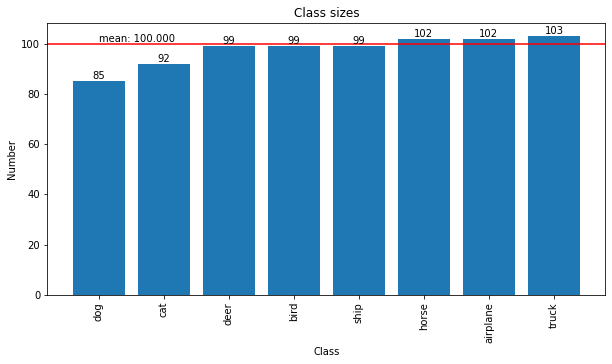

In [14]:
# show the class sizes
from data.data_parts import get_datapart
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import csv
import os
import pickle

data, data_files, labels = get_datapart('labelled', 'cifar-10-batches-py')

with open(os.path.join('cifar-10-batches-py', 'batches.meta'), 'rb') as f:
    class_num_to_name = pickle.load(f, encoding='bytes')[b'label_names']
    class_num_to_name = [class_name.decode('ascii') for class_name in class_num_to_name]

classnumbers = labels
classnames = [class_num_to_name[classnumber] for classnumber in classnumbers]

# # load the data and get the class names and sizes
class_names = np.array(list(Counter(classnames).keys())) # equals to list(set(words))
class_sizes = np.array(list(Counter(classnames).values())) # counts the elements' frequency
class_sizes_mean = np.mean(class_sizes)

# # sort the classes according to the class size
sorting_indices = np.argsort(class_sizes)[:-2]
class_sizes = class_sizes[sorting_indices]
class_names = class_names[sorting_indices]

# # plot
fig = plt.figure(figsize=[10, 5])
plt.bar(class_names, class_sizes)
plt.axhline(class_sizes_mean, color="red")
plt.text(0, class_sizes_mean, f'mean: {class_sizes_mean:.3f}', va='bottom', ha="left")
plt.xticks(rotation=90)
plt.title('Class sizes')
plt.xlabel('Class')
plt.ylabel('Number')
for i in range(len(class_sizes)):
    plt.annotate(str(class_sizes[i]), 
                 xy=(class_names[i],class_sizes[i]), 
                 ha='center', va='bottom')
plt.show()